In [1]:
from IPython.display import HTML

def apply_html_tweak(html_script_path):
    with open(html_script_path, encoding='utf-8') as fh:
        display(HTML(fh.read()))

apply_html_tweak("../../reveal_js_tweaks.txt")
#apply_html_tweak("../../rise_tweaks.txt")

Note: the following slides were presented during a second Meetup

## 5.4. Renaming columns/indices

Let's create an example DataFrame

In [2]:
import pandas as pd # pandas is very frequently abbreviated as "pd"

# DataFrames are composed of columns, indices and values.
data = {'name':['John', 'Alex', 'Daniel'], # {column:values}
        'is_client':[True, None, True],
        'number_of_cars':[2, None, None]}

index = pd.Index([100, 200, 300], name='id') # the index is a separate entity

df = pd.DataFrame(data=data, index=index).convert_dtypes()
df

,name,is_client,number_of_cars
id,,,
100,John,True,2
200,Alex,<NA>,<NA>
300,Daniel,True,<NA>


### Renaming columns

In [3]:
df.rename(columns={'name':'first_name', 'number_of_cars':'number_of_horses'})

,first_name,is_client,number_of_horses
id,,,
100,John,True,2
200,Alex,<NA>,<NA>
300,Daniel,True,<NA>


### Renaming indices

In [4]:
df.rename(index={100:999, 200:1000}) # by default `df.rename` renames the index so index= is superfluous

,name,is_client,number_of_cars
id,,,
999,John,True,2
1000,Alex,<NA>,<NA>
300,Daniel,True,<NA>


Alternatively, you can also change the column/index names with an assignment to `df.columns` or `df.index` respectively

In [5]:
df.columns = ['first_name', 'likes_pizza', 'number_of_horses']
df

,first_name,likes_pizza,number_of_horses
id,,,
100,John,True,2
200,Alex,<NA>,<NA>
300,Daniel,True,<NA>


In [6]:
df.index = pd.Index([10, 20, 30], name='id') # a plain list would work but you'd lose the name ('id')
df

,first_name,likes_pizza,number_of_horses
id,,,
10,John,True,2
20,Alex,<NA>,<NA>
30,Daniel,True,<NA>


### Pro-tip: using functions (or other callables e.g. class methods) to rename indices or columns

Pro-tip inside pro-tip: Consider getting familiar with **lambdas** (functions that only need one line) for pandas 🐼. It will make your code shorter.

In [7]:
def rename_column(column):
    # add safety in case we have a non string column
    if isinstance(column, str):
        return column.upper()
    else:
        return column

# same thing as a one liner (note that you don't need a variable
# you could pass this directly to the "columns" argument)
rename_column = lambda c: c.upper() if isinstance(c, str) else c

df.rename(columns=rename_column)

,FIRST_NAME,LIKES_PIZZA,NUMBER_OF_HORSES
id,,,
10,John,True,2
20,Alex,<NA>,<NA>
30,Daniel,True,<NA>


See also the [example](https://github.com/ThibTrip/thib/tree/master/2021/pandas_crash_course/examples/rename/add_sheet_names_to_columns.ipynb) I made for Irene Sanjay who needed to read Excel sheets into pandas and add the sheet names to the columns.

## 5.5. Setting or resetting the index

🐼 Reminder: **index** and **columns** are **separate entities** in pandas! (indices are indicated on the left side in **bold**).

Resetting the index (or an index level with the argument `level`) puts it into columns (if argument `drop` is `False` which is default otherwise the index/index level is deleted)

In [8]:
display(df)
df.reset_index(inplace=True)
df

,first_name,likes_pizza,number_of_horses
id,,,
10,John,True,2
20,Alex,<NA>,<NA>
30,Daniel,True,<NA>


,id,first_name,likes_pizza,number_of_horses
0,10,John,True,2
1,20,Alex,<NA>,<NA>
2,30,Daniel,True,<NA>


Set column(s) as the index by passing a str or a list of str

In [9]:
df.set_index('id', inplace=True)
df

,first_name,likes_pizza,number_of_horses
id,,,
10,John,True,2
20,Alex,<NA>,<NA>
30,Daniel,True,<NA>


## 5.6. Inserting a column at a specific position

(Instead of at the end by default)

Unlike most methods `pd.DataFrame.insert` does not require `inplace` or asssignment

In [10]:
df.insert(loc=0, column='test', value=pd.NA) # pd.NA is the new null value from pandas
df

,test,first_name,likes_pizza,number_of_horses
id,,,,
10,<NA>,John,True,2
20,<NA>,Alex,<NA>,<NA>
30,<NA>,Daniel,True,<NA>


## 5.7. Value counts

In [11]:
df = pd.DataFrame({'first_name':['John']*4 + ['Jane', pd.NA],
                   'last_name':['Rambo', 'Travolta', 'Doe', 'Doe', 'Doe', pd.NA]})
df

,first_name,last_name
0,John,Rambo
1,John,Travolta
2,John,Doe
3,John,Doe
4,Jane,Doe
5,<NA>,<NA>


In [12]:
display(df['first_name'])
df['first_name'].value_counts() # ⚠️ default (dropna=True means nulls values are not counted)

0    John
1    John
2    John
3    John
4    Jane
5    <NA>
Name: first_name, dtype: object

John    4
Jane    1
Name: first_name, dtype: int64

In [13]:
df['first_name'].value_counts(dropna=False)

John    4
Jane    1
NaN     1
Name: first_name, dtype: int64

there is a (somewhat) new method for DataFrames with the same purpose as for Series. However it does not count nulls (and there is no parameter for it) so you'd have to use a placeholder or something to get around that like I do here 🐒

In [14]:
# fillna is used to replace NULL (pd.NA, None or similar null value) with a value
df.fillna('???').value_counts(subset=['first_name', 'last_name'])

first_name  last_name
John        Doe          2
            Travolta     1
            Rambo        1
Jane        Doe          1
???         ???          1
dtype: int64

# 6. String operations

Many string operations have been "integrated" into `pandas` directly and are accessible under `pd.Series.str`

In [15]:
df = pd.DataFrame({'name':['____Thibault', 'John', 'Alex', 'Daniel'],
                   'favorite_dish':['salad', 'spaghetti al pesto', pd.NA, 'pasta']})
df

,name,favorite_dish
0,____Thibault,salad
1,John,spaghetti al pesto
2,Alex,<NA>
3,Daniel,pasta


`str.strip()`

In [16]:
display(df)
df['name'] = df['name'].str.strip('_')
df

,name,favorite_dish
0,____Thibault,salad
1,John,spaghetti al pesto
2,Alex,<NA>
3,Daniel,pasta


,name,favorite_dish
0,Thibault,salad
1,John,spaghetti al pesto
2,Alex,<NA>
3,Daniel,pasta


`str.upper()`

In [17]:
df['name'] = df['name'].str.upper()
df

,name,favorite_dish
0,THIBAULT,salad
1,JOHN,spaghetti al pesto
2,ALEX,<NA>
3,DANIEL,pasta


I think you get the point. There are many more [string methods](https://pandas.pydata.org/docs/user_guide/text.html#method-summary) explained in the docs

An interesting method is `str.contains` which is very useful to make masks. Below is an example. It is rather stupid 🐒 be we'll optimize this in the next step. Here we are going to keep only rows of people who like italian food.

Note: the argument `regex` in `str.contains` is to indicate if we are using the language called [regular expression](https://en.wikipedia.org/wiki/Regular_expression) (it's super useful in pandas). We'll see that after.

In [18]:
# construct mask
# tell me for each value in column "favorite_dish" if it contains "spaghetti" (e.g. "spaghetti al pesto")
likes_spaghetti = df['favorite_dish'].str.contains(pat='spaghetti',
                                                   regex=False,
                                                   na=False) # IMPORTANT! how to evaluate NULLs
# tell me for each value in column "favorite_dish" if it contains "pasta"
likes_pasta = df['favorite_dish'].str.contains(pat='pasta', regex=False, na=False)
likes_italian_food = likes_spaghetti | likes_pasta # combine conditions described above with an OR

# show the mask then show the segment where the mask is True
# I renamed the Series containing the mask so the output is more self explanatory
display(likes_italian_food.rename('likes_italian_food'))
display(df)
df.loc[likes_italian_food, :]

0    False
1     True
2    False
3     True
Name: likes_italian_food, dtype: bool

,name,favorite_dish
0,THIBAULT,salad
1,JOHN,spaghetti al pesto
2,ALEX,<NA>
3,DANIEL,pasta


,name,favorite_dish
1,JOHN,spaghetti al pesto
3,DANIEL,pasta


Here's how to do the same thing more easely by using a regex ([regular expression](https://en.wikipedia.org/wiki/Regular_expression)) pattern.

In [19]:
import re

# pattern (so called regular expression or regex) for "spaghetti" or "pasta"
# use a compiled pattern for lots of data (better performance)
re_italian_food = re.compile(r'spaghetti|pasta')

# construct mask
likes_italian_food = df['favorite_dish'].str.contains(pat=re_italian_food, regex=True, na=False)

# show the mask then show the segment where the mask is True
display(likes_italian_food.rename('likes_italian_food'))
display(df)
df.loc[likes_italian_food, :]

0    False
1     True
2    False
3     True
Name: likes_italian_food, dtype: bool

,name,favorite_dish
0,THIBAULT,salad
1,JOHN,spaghetti al pesto
2,ALEX,<NA>
3,DANIEL,pasta


,name,favorite_dish
1,JOHN,spaghetti al pesto
3,DANIEL,pasta


### Pro-tip

You can use the `str` accessor to slice individual elements 😎

If name was a Series of list it would select the first element of each list

In [20]:
display(df['name'])
df['name'].str[0:2] # same principle as for instance 'THIBAULT'[0:2] -> 'TH'

0    THIBAULT
1        JOHN
2        ALEX
3      DANIEL
Name: name, dtype: object

0    TH
1    JO
2    AL
3    DA
Name: name, dtype: object

# 7. Time operations

⚠️ always use **UTC** when possible! This will avoid lots of hassle with timezones. Besides API usually use UTC as well. This does not only apply to pandas.

If I need to deliver data to a customer of port-neo, I will do a timezone conversion at the very last step (so usually for vizualizations) within for instance a SQL query or SQL view.

Let's create a Series with string timestamps that we will **convert** to the correct data type.

In [21]:
timestamps = ['2020-01-15 10:00:00', '2020-02-20 20:00:00', '2020-01-01 12:00:00']
s = pd.Series(timestamps, name='timestamp')
s

0    2020-01-15 10:00:00
1    2020-02-20 20:00:00
2    2020-01-01 12:00:00
Name: timestamp, dtype: object

⚠️ This is not a pandas Series of datetime yet! Those are still strings that we need to convert (we can see the "object" dtype indicating it's still strings).

converting a Series to the datetime dtype

In [22]:
s = pd.to_datetime(s, utc=True) # I'll say my timestamps are in UTC (no conversion happens here! the timezone info does not even exist in my strings)
s

0   2020-01-15 10:00:00+00:00
1   2020-02-20 20:00:00+00:00
2   2020-01-01 12:00:00+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

time operations are available via the `dt` accessor

In [23]:
s.dt.year

0    2020
1    2020
2    2020
Name: timestamp, dtype: int64

In [24]:
s.dt.tz_convert('Europe/Berlin') # timezone conversion

0   2020-01-15 11:00:00+01:00
1   2020-02-20 21:00:00+01:00
2   2020-01-01 13:00:00+01:00
Name: timestamp, dtype: datetime64[ns, Europe/Berlin]

In [25]:
display(s)
s - pd.Timedelta(days=10, hours=5) # this is pretty cool, we can just substract 10 days +5hours to all timestamps like that

0   2020-01-15 10:00:00+00:00
1   2020-02-20 20:00:00+00:00
2   2020-01-01 12:00:00+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

0   2020-01-05 05:00:00+00:00
1   2020-02-10 15:00:00+00:00
2   2019-12-22 07:00:00+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

you can get timedeltas between two datetime Series

In [26]:
s2 = pd.Series(['2019-01-01 10:00:00', '2020-02-02 23:00:00', '2020-03-02 12:00:00'])
s2 = pd.to_datetime(s2, utc=True)

s_deltas = s - s2
s_deltas

0    379 days 00:00:00
1     17 days 21:00:00
2   -61 days +00:00:00
dtype: timedelta64[ns]

In [27]:
s_deltas.dt.days

0    379
1     17
2    -61
dtype: int64

Pro tip: you can also use pandas for time operations outside of Series

In [28]:
from dateutil import relativedelta

ts = pd.Timestamp('now', tz='utc') # current date and time in UTC
print(f'Current timestamp in UTC: {ts}\n')

print(f'Day of the month:{ts.day}') # print which day of the month it is

# which date and time do we get if we substract 3 months?
# note here that we can even interact with the standard library relativedelta!
three_months_ago = ts - relativedelta.relativedelta(months=3)
three_months_ago

Current timestamp in UTC: 2021-02-27 17:57:11.114102+00:00

Day of the month:27


Timestamp('2020-11-27 17:57:11.114102+0000', tz='UTC')

In [29]:
three_days_ago = ts - pd.Timedelta(days=3) # 3 days ago
three_days_ago

Timestamp('2021-02-24 17:57:11.114102+0000', tz='UTC')

convert `pd.Timestamp` to regular `datetime.datetime` if needed

In [30]:
py_dt = three_days_ago.to_pydatetime()
py_dt

datetime.datetime(2021, 2, 24, 17, 57, 11, 114102, tzinfo=<UTC>)

# 8. Transformations

Let me create (or rather copy paste from [stackoverflow](https://stackoverflow.com/a/44923103)) a function to display DataFrames side by side. 

In [31]:
from IPython.display import display_html
def display_side_by_side(*args):
    display_html(''.join(df.to_html() for df in args).replace('table','table style="display:inline"'),raw=True)

## 8.1. Merge/Join

Merging/joining is one way to combine the information of one DataFrame with another one. One talks about a **"left"** DataFrame and a **"right"** DataFrame.

Pandas gives you multiple ways to decide how to merge/join based on which records are in the left and right DataFrame
(this is very similar to SQL but SQL has even more ways to decide). Below is an example showing those ways to merge/join
(we merge on the index here but we can also merge with columns as we'll see):

In [32]:
# code used to make the charts
df1 = pd.DataFrame({'A':['', ''], 'B':['', '']}, index=pd.Index([0, 1], name='id'))
df2 = pd.DataFrame({'C':['', ''], 'D':['', '']}, index=pd.Index([0, 2], name='id'))

display_side_by_side(df1, df2)
display_side_by_side(*(df1.merge(df2, how=method, on='id').fillna('') for method in ('left', 'right', 'inner', 'outer')))

,A,B
id,,
0,,
1,,
,C,D
id,,
0,,
2,,


,A,B,C,D
id,,,,
0,,,,
1,,,,
,A,B,C,D
id,,,,
0,,,,
2,,,,
,A,B,C,D
id,,,,
0,,,,


![Joins](./imgs/joins.png)

In pandas you can use the DataFrame methods `df.merge` and `df.join`. They are very similar but usually people will use `df.join` when merging DataFrames using indices and they'll use `df.merge` when merging DataFrames using columns ¯\\\_(ツ)\_/¯.

Let's create example DataFrames

In [33]:
df1 = pd.DataFrame({'first_name':['Gabriela', 'Arnold', 'John'],
                    'last_name':['Müller', 'Schwarzenegger', 'Rambo'],
                    'country':['DE', 'US', 'US']}).convert_dtypes()
df2 = pd.DataFrame({'first_name':['Arthur', 'Arnold', 'John', 'John', 'Jane'],
                    'last_name':['Mustermann', 'Schwarzenegger', 'Rambo', 'Travolta', 'Doe'],
                    'mothertongue':['de', 'de', 'en', 'en', 'en']}).convert_dtypes()
display_side_by_side(df1, df2)

,first_name,last_name,country
0,Gabriela,Müller,DE
1,Arnold,Schwarzenegger,US
2,John,Rambo,US
,first_name,last_name,mothertongue
0,Arthur,Mustermann,de
1,Arnold,Schwarzenegger,de
2,John,Rambo,en
3,John,Travolta,en
4,Jane,Doe,en


Let's merge our DataFrames in various ways to see what happens! Let's start with a **left** merge.

Pro-tip: the argument `validate` is super useful! It will verify what kind of relationship we have (and throw an error if conditions are not met):
* `1:1`: keys we merge on are unique in both left and right
* `1:m` (1 to many): keys are unique in left
* `m:1`: keys are unique in right
* `m:m`: no keys have to be unique (used for informative purposes in your code)

In [34]:
display_side_by_side(df1, df2)
df1.merge(right=df2, how='left', on=['first_name', 'last_name'], validate='1:1')

,first_name,last_name,country
0,Gabriela,Müller,DE
1,Arnold,Schwarzenegger,US
2,John,Rambo,US
,first_name,last_name,mothertongue
0,Arthur,Mustermann,de
1,Arnold,Schwarzenegger,de
2,John,Rambo,en
3,John,Travolta,en
4,Jane,Doe,en


,first_name,last_name,country,mothertongue
0,Gabriela,Müller,DE,<NA>
1,Arnold,Schwarzenegger,US,de
2,John,Rambo,US,en


Inner merge

In [35]:
display_side_by_side(df1, df2)
df1.merge(right=df2, how='inner', on=['first_name', 'last_name'], validate='1:1')

,first_name,last_name,country
0,Gabriela,Müller,DE
1,Arnold,Schwarzenegger,US
2,John,Rambo,US
,first_name,last_name,mothertongue
0,Arthur,Mustermann,de
1,Arnold,Schwarzenegger,de
2,John,Rambo,en
3,John,Travolta,en
4,Jane,Doe,en


,first_name,last_name,country,mothertongue
0,Arnold,Schwarzenegger,US,de
1,John,Rambo,US,en


⚠️ In case of duplicated keys, rows are added so don't forget to use `validate` to avoid that!

Here is an example where I merge with `first_name` and I get duplicates for John. This is also a good opportunity to show you how to handle duplicated column names in left and right DataFrames by using suffixes.

In [36]:
display_side_by_side(df1, df2)
df1.merge(right=df2, how='left', on='first_name', suffixes=('', '_right'))

,first_name,last_name,country
0,Gabriela,Müller,DE
1,Arnold,Schwarzenegger,US
2,John,Rambo,US
,first_name,last_name,mothertongue
0,Arthur,Mustermann,de
1,Arnold,Schwarzenegger,de
2,John,Rambo,en
3,John,Travolta,en
4,Jane,Doe,en


,first_name,last_name,country,last_name_right,mothertongue
0,Gabriela,Müller,DE,<NA>,<NA>
1,Arnold,Schwarzenegger,US,Schwarzenegger,de
2,John,Rambo,US,Rambo,en
3,John,Rambo,US,Travolta,en


Let's merge/join using the index. We'll set a relatively meaningfull index first.

In [37]:
df1.set_index(['first_name', 'last_name'], inplace=True)
df2.set_index(['first_name', 'last_name'], inplace=True)

display_side_by_side(df1, df2)

country 
 
 
 first_name 
 last_name 
 
 
 
 
 
 Gabriela 
 Müller 
 DE 
 
 
 Arnold 
 Schwarzenegger 
 US 
 
 
 John 
 Rambo 
 US 
 
 
 
 
 
 
 
 mothertongue 
 
 
 first_name 
 last_name 
 
 
 
 
 
 Arthur 
 Mustermann 
 de 
 
 
 Arnold 
 Schwarzenegger 
 de 
 
 
 John 
 Rambo 
 en 
 
 
 Travolta 
 en 
 
 
 Jane 
 Doe 
 en

Yep 3 ways (and maybe more I have forgotten) to do the same thing ¯\\\_(ツ)\_/¯. I personally like to use `df.join` when merging via the index because it's meant specifically for that.

In [38]:
df1.join(other=df2, how='left')

,,country,mothertongue
first_name,last_name,,
Gabriela,Müller,DE,<NA>
Arnold,Schwarzenegger,US,de
John,Rambo,US,en


In [39]:
df1.merge(right=df2, how='left', on=['first_name', 'last_name'])

,,country,mothertongue
first_name,last_name,,
Gabriela,Müller,DE,<NA>
Arnold,Schwarzenegger,US,de
John,Rambo,US,en


In [40]:
df1.merge(right=df2, how='left', right_index=True, left_index=True)

,,country,mothertongue
first_name,last_name,,
Gabriela,Müller,DE,<NA>
Arnold,Schwarzenegger,US,de
John,Rambo,US,en


## 8.2. Concatenate


![pandas concatenate](./imgs/pandas_concat.png)

🐼 When concatenating pandas will also add missing columns (if concatenating along indices) or indices (if concatenating along columns) if argument `join` is set to `outer` (default, as opposed to `inner`).

For instance here the column `is_client` does not exist in `df1` but exists in `df2`. The concatenated DataFrame contains the `is_client` but with NULLs for the data that comes from `df1`.

In [41]:
df1 = pd.DataFrame({'first_name':['Ralf', 'John'], 'number_of_cars':[0, 2]},
                   index=pd.Index((100, 200), name='id')).convert_dtypes()
df2 = pd.DataFrame({'first_name':['Arthur', 'Daniel'], 'number_of_cars':[1, 1], 'is_client':[True, True]},
                   index=pd.Index((300, 400), name='id')).convert_dtypes()

display_side_by_side(df1, df2)

df_all = pd.concat(objs=(df1, df2),
                   axis='rows', # default
                   join='outer', # default
                   ignore_index=False, # also default (we do not want "id" to go away)
                   verify_integrity=True) # check for duplicates (warning: can be more expensive than the concatenation itself)
df_all

first_name 
 number_of_cars 
 
 
 id 
 
 
 
 
 
 
 100 
 Ralf 
 0 
 
 
 200 
 John 
 2 
 
 
 
 
 
 
 first_name 
 number_of_cars 
 is_client 
 
 
 id 
 
 
 
 
 
 
 
 300 
 Arthur 
 1 
 True 
 
 
 400 
 Daniel 
 1 
 True

,first_name,number_of_cars,is_client
id,,,
100,Ralf,0,<NA>
200,John,2,<NA>
300,Arthur,1,True
400,Daniel,1,True


## 8.3. Groupby

Let's get an example DataFrame I generated

In [42]:
df = pd.read_pickle('./data/df_products_random.pickle')
df

,profit,product,profile_id,timestamp
purchase_id,,,,
0,262.311584,mobile phone,9,2018-01-04 06:31:21+00:00
1,1.219595,banana,8,2018-01-27 03:59:38+00:00
2,103.239984,table,9,2018-02-02 21:19:35+00:00
3,1.533321,banana,4,2018-02-06 11:22:46+00:00
4,141.481716,table,1,2018-02-11 20:57:53+00:00
...,...,...,...,...
95,22.004473,chair,9,2020-11-19 01:18:42+00:00
96,233.276744,mobile phone,8,2020-11-27 11:33:54+00:00
97,130.576246,table,3,2020-12-03 06:49:04+00:00


Rudimentary groupby where we get the sum of profits for each product

In [43]:
s_profits_per_product = df.groupby(by='product')['profit'].sum()  # note 'product' or ['product'] will both work
s_profits_per_product

product
banana            26.431585
chair            662.167793
computer        6378.566255
mobile phone    3554.871317
table           2650.165115
Name: profit, dtype: float64

Groupby using the "new" syntax (called NamedAggregation). Note that with this new syntax we'll get a DataFrame back and not a Series like before.

I also demonstrate that `by` also accepts Series and not just DataFrame column names. As long as the index of all objects are the same pandas should accept it 🐼.

Here we'll group by year+product to know how much profit was generated every year by every product.

⚠️ Remember to set parameter `dropna` to `False` in `df.groupby` if you want to aggregate records where some keys are NULLs (in our case either the year or the product or both)

In [44]:
s_year = df['timestamp'].dt.year.rename('year')

# new syntax for df.groupby(...).agg(???):
# result_col_name=(source_col_name, operation), operation can be a function or a pd.Series attribute
df.groupby(by=[s_year, 'product'], dropna=False).agg(sum_of_profit=('profit', 'sum'),
                                                     mean_profit_per_purchase=('profit', 'mean'),
                                                     number_of_buyers=('profile_id', 'nunique'))

sum_of_profit  mean_profit_per_purchase  number_of_buyers
year product                                                                
2018 banana             7.962856                  1.327143                 5
     chair            162.631200                 23.233029                 4
     computer        3037.915899                337.546211                 7
     mobile phone    1025.276645                256.319161                 3
     table            876.098786                125.156969                 6
2019 banana            12.716271                  1.412919                 5
     chair            269.664788                 24.514981                 7
     computer        1371.318689                342.829672                 4
     mobile phone    1564.991420                260.831903                 5
     table            902.374777                128.910682                 6
2020 banana             5.752457                  1.438114                 3
     chair            229.871805                 25.541312                 6
     computer        1969.331668                328.221945                 4
     mobile phone     964.603253                241.150813                 3
     table            871.691553                124.527365                 5

What happens when using groupby exactly 🤔? I hacked around to show you how pandas constitutes groups.

In [45]:
# don't mind the cryptic and not very pep8y code 🙈
(df.head(30)
 .groupby(by=[s_year, 'product'])
 .agg(some_column=('profit', lambda s: display(s.rename_axis(index='purchase_id')
                                                .to_frame()
                                                .assign(year=df['timestamp'].dt.year,          
                                                        product=df['product']))))); # ; cancels the output

,profit,year,product
purchase_id,,,
1,1.219595,2018,banana
3,1.533321,2018,banana
9,1.507194,2018,banana
17,1.489057,2018,banana
18,1.006355,2018,banana
20,1.207335,2018,banana


,profit,year,product
purchase_id,,,
6,27.883223,2018,chair
12,21.094397,2018,chair
13,20.244862,2018,chair
15,23.412378,2018,chair
19,21.764304,2018,chair
22,23.696616,2018,chair
25,24.535419,2018,chair


,profit,year,product
purchase_id,,,
5,300.981553,2018,computer
7,312.892860,2018,computer
8,330.141383,2018,computer
16,322.172555,2018,computer
23,311.469290,2018,computer
26,350.169896,2018,computer
28,355.244494,2018,computer


,profit,year,product
purchase_id,,,
0,262.311584,2018,mobile phone
10,205.518660,2018,mobile phone
24,261.833422,2018,mobile phone


,profit,year,product
purchase_id,,,
2,103.239984,2018,table
4,141.481716,2018,table
11,140.113547,2018,table
14,128.252710,2018,table
21,122.632964,2018,table
27,115.579610,2018,table
29,124.798255,2018,table


## 8.5. Stack/Melt

This will "elongate" a DataFrame. `df.melt` returns a DataFrame while `df.stack` returns a Series with a multidimensional index (harder to work with for beginners) and makes it easier for labelling the columns of the resulting DataFrame (it'll hopefully become clearer with the example).

⚠️ Since I decided to keep the index (`ignore_index=False`) in the example below I ended up with indices **duplicated index values** which is **not great**. Fortunately I'll show you how to fix that after.

In [46]:
df = pd.DataFrame({'first_name':['Ralf', 'John'], 'number_of_cars':[0, 2], 'number_of_horses':[1, 10]}, index=pd.Index((100, 200), name='id'))
df_melted = df.melt(var_name='column', # default is "variable" (or actually df.columns.name if not None) 
                    value_name='value',
                    ignore_index=False) # True by default

print('Left: example DataFrame. Right: "elongated" DataFrame (columns turn to rows)')
display_side_by_side(df, df_melted)

Left: example DataFrame. Right: "elongated" DataFrame (columns turn to rows)


first_name 
 number_of_cars 
 number_of_horses 
 
 
 id 
 
 
 
 
 
 
 
 100 
 Ralf 
 0 
 1 
 
 
 200 
 John 
 2 
 10 
 
 
 
 
 
 
 column 
 value 
 
 
 id 
 
 
 
 
 
 
 100 
 first_name 
 Ralf 
 
 
 200 
 first_name 
 John 
 
 
 100 
 number_of_cars 
 0 
 
 
 200 
 number_of_cars 
 2 
 
 
 100 
 number_of_horses 
 1 
 
 
 200 
 number_of_horses 
 10

Removing the duplicated indices

We could just reset the index...

In [47]:
df_melted.reset_index()

,id,column,value
0,100,first_name,Ralf
1,200,first_name,John
2,100,number_of_cars,0
3,200,number_of_cars,2
4,100,number_of_horses,1
5,200,number_of_horses,10


...Or add "column" as an index level. I'll also sort the index to show the multiple levels better.

In [48]:
df_melted.set_index('column', append=True).sort_index().head()

value
id  column                
100 first_name        Ralf
    number_of_cars       0
    number_of_horses     1
200 first_name        John
    number_of_cars       2

# 9. Using custom functions

Let's create a function to "normalize" a string containing german text. **Don't focus on the code**, I just needed a function that is "dumb" enough for everyone to understand what it does but also "clever" enough that it would not make much sense to use pandas' integrated methods (e.g. `Series.str.strip`)

In [49]:
import unidecode # pip install unidecode
from string import punctuation

# create a translation table (character number:replacement) for german characters to convert them to ascii
ascii_german_accents = {'ä':'ae', 'ö':'oe', 'ü':'ue', 'ß':'ss'}
ascii_german_accents = {ord(c):repl for c, repl in ascii_german_accents.items()}

def normalize_german_string(string, remove_punctuation=True):
    # passthrough for non strings
    if not isinstance(string, str):
        return string
    else:
        result = string.strip().lower().translate(ascii_german_accents)
        if remove_punctuation:
            result = ''.join(c for c in result if c not in punctuation)
        return unidecode.unidecode(result) # in case some accents were still present -> ascii

# interactive test (as opposed to using assertions)
before = 'Mag Herr Müller mehr Kartoffeln?'
after = normalize_german_string(before)
print(f'"{before}" -> "{after}"')

"Mag Herr Müller mehr Kartoffeln?" -> "mag herr mueller mehr kartoffeln"


## 9.1. for Series

Use `map` or `apply` for Series (map uses the function on each element while apply uses the function on the array but it's the same in the case of a Series since it's one dimensional anyways).

* When to use `map`: you can pass directly the function (without using arguments) and optionally you want to ignore NULLs (thanks to the parameter `na_action`)
* When to use `apply`: you want to pass arguments to the function (well I mean you could also use `map` with a "rewritten" function e.g. a partial but let's keep it simple 😐)

In [50]:
s = pd.Series(['   Alexander Müller geht schwimmen.', 'München, Paris und Berlin sind große Städten.  ', pd.NA])
s.map(normalize_german_string, na_action='ignore')

0                  alexander mueller geht schwimmen
1    muenchen paris und berlin sind grosse staedten
2                                              <NA>
dtype: object

In [51]:
s.apply(normalize_german_string, remove_punctuation=False)

0                   alexander mueller geht schwimmen.
1    muenchen, paris und berlin sind grosse staedten.
2                                                <NA>
dtype: object

## 9.2. for DataFrames

* use `applymap` for applying a function to all "cells" of a DataFrame (similarly to `pd.Series.map` but ⚠️ there is no `pd.DataFrame.map` method!) 
* use `apply` for array wise operations (we'll get to that...)

In [52]:
df = pd.DataFrame({'city':['München', 'Paris', pd.NA], 'full_name':['Alexander, Müller', 'Marcel Dupont?', 'John.']})
display(df)

# this is rather simple as you can see...
df.applymap(normalize_german_string)

,city,full_name
0,München,"Alexander, Müller"
1,Paris,Marcel Dupont?
2,<NA>,John.


,city,full_name
0,muenchen,alexander mueller
1,paris,marcel dupont
2,<NA>,john


What if I want to pass arguments to applymap 😕?

In [53]:
def normalize_german_string_modified(string):
    return normalize_german_string(string, remove_punctuation=False)

df.applymap(normalize_german_string_modified)

,city,full_name
0,muenchen,"alexander, mueller"
1,paris,marcel dupont?
2,<NA>,john.


Simpler version of the code above

In [54]:
# string or x, the argument name does not matter as long as it's the same everywhere
df.applymap(lambda string: normalize_german_string(string, remove_punctuation=False))

,city,full_name
0,muenchen,"alexander, mueller"
1,paris,marcel dupont?
2,<NA>,john.


Array wise operations with `apply`

Let's create an example function which finds a square around coordinates in a given radius. Again **the code of the function is not important**, it's just an example for using `apply` with a DataFrame.

Note: I actually use a similar function to reduce searches in a database when looking up information on coordinates.

In [55]:
import geopy.distance # pip install geopy
from collections import namedtuple

Radius = namedtuple(typename='Radius', field_names=('min_latitude', 'max_latitude', 'min_longitude', 'max_longitude'))

def get_radius_around_coordinates(latitude, longitude, radius_in_km=10):
    distance_obj = geopy.distance.distance(kilometers=radius_in_km)
    point = (latitude, longitude)
    min_latitude = distance_obj.destination(point=point, bearing=180).latitude # North
    max_latitude = distance_obj.destination(point=point, bearing=0).latitude # South
    min_longitude = distance_obj.destination(point=point, bearing=-90).longitude # West
    max_longitude = distance_obj.destination(point=point, bearing=90).longitude # East
    return Radius(min_latitude, max_latitude, min_longitude, max_longitude)

get_radius_around_coordinates(latitude=47.987226, longitude=7.6563371, radius_in_km=10)

Radius(min_latitude=47.897289206970456, max_latitude=48.07716137792281, min_longitude=7.522367588550245, max_longitude=7.790306611449755)

Let's use the function

In [56]:
df = pd.DataFrame({'latitude':[47.987226, 47.987226], 'longitude':[7.6563371, 7.6563371]})
display(df)
# the name "row" in my lambda below does not really show that it is in fact a Series (it's the row that has been transposed) but it helps for comprehension
df['radius'] = df.apply(lambda row: get_radius_around_coordinates(latitude=row['latitude'],
                                                                  longitude=row['longitude']),
                        axis='columns')
df

,latitude,longitude
0,47.987226,7.656337
1,47.987226,7.656337


,latitude,longitude,radius
0,47.987226,7.656337,"(47.897289206970456, 48.07716137792281, 7.5223..."
1,47.987226,7.656337,"(47.897289206970456, 48.07716137792281, 7.5223..."


What's happening here? Well it's hard to explain but pandas passes individual rows (transposed) to be processed...

![what](./imgs/what.jpg)

In [57]:
# let's show the DataFrame as it was before
df.drop(columns=['radius'], inplace=True, errors='ignore') # in case we want to reexecute the cell when presenting
display(df)

# let's see what pandas does when we do apply along columns
df.apply(lambda row: display(row), axis='columns');

,latitude,longitude
0,47.987226,7.656337
1,47.987226,7.656337


latitude     47.987226
longitude     7.656337
Name: 0, dtype: float64

latitude     47.987226
longitude     7.656337
Name: 1, dtype: float64

# 10. Outside of scope

## Method chaining

![chaining](./imgs/chaining.jpg)

_[Image Source](https://micador.com.au/blogs/ideas/2016/Oct/14/paper-snake-radical-reptile)_

> Method chaining is a technique that is used for making multiple method calls on the same object, using the object reference just once.
>
> _Source: [TutorialsPoint](https://www.tutorialspoint.com/Explain-Python-class-method-chaining)_

Without method chaining

In [58]:
string = 'foobar'
new_string = string.replace('bar', 'baz')
new_string = new_string.upper()
new_string

'FOOBAZ'

With method chaining

In [59]:
string = 'foobar'
new_string = string.replace('bar', 'baz').upper() # string.replace(...) returns a string so I can continue using string methods
new_string

'FOOBAZ'

In pandas you can make **almost everything with method chaining** 🐼! I find it useful to save some lines of code and temporary variables.
Also for me it's a way to group operations together in the same block.

A very useful method I have not talked about is `df.assign` for creating new columns in a DataFrame with method chaining
(it returns a copy of the DataFrame with the new column).

⚠️ Be careful with `df.assign` and `df.loc` within method chainings! Make sure you do not refer to a "stale" object.
You can also use functions to refer to the DataFrame you are "method chaining" with as I will demonstrate.

Let's reread the products DataFrame from before

In [60]:
df = pd.read_pickle('./data/df_products_random.pickle').head(20) # let's just take a sample
df.head()

,profit,product,profile_id,timestamp
purchase_id,,,,
0,262.311584,mobile phone,9,2018-01-04 06:31:21+00:00
1,1.219595,banana,8,2018-01-27 03:59:38+00:00
2,103.239984,table,9,2018-02-02 21:19:35+00:00
3,1.533321,banana,4,2018-02-06 11:22:46+00:00
4,141.481716,table,1,2018-02-11 20:57:53+00:00


Let's remove mobile phones, then group by profile id and product.

Pro-tip: you can use **parentheses** to indicate Python that subsequent lines of codes belong to the same statement.

We'll also add the columns "test" (we just write "foo" in this column) and "good_profit" (groups for which the sum of profits is higher than 300)

In [61]:
# IMPORTANT! In assign, when refer to a new column called "sum_of_profits" which does not exist yet
# (it is created withing the chain thanks to the groupby operation)
# so we have to use a function (see lambda below)

(df.loc[df['product'] != 'mobile phone', :]
 .groupby(by=['profile_id', 'product'])
 .agg(sum_of_profits=('profit', 'sum'))
 .assign(test='foo', good_profit=lambda df: df['sum_of_profits'] > 300)) 

sum_of_profits test  good_profit
profile_id product                                   
1          table         141.481716  foo        False
2          banana          1.507194  foo        False
           table         128.252710  foo        False
4          banana          2.539677  foo        False
           chair          42.009166  foo        False
           table         140.113547  foo        False
5          computer      652.313938  foo         True
6          computer      312.892860  foo         True
8          banana          1.219595  foo        False
           chair          21.094397  foo        False
9          banana          1.489057  foo        False
           chair          51.295601  foo        False
           computer      300.981553  foo         True
           table         103.239984  foo        False

Same thing without even using a `df` variable. I don't necessarily suggest going so deep into method chaining with pandas.

It will make code more difficult to read and hard to troubleshoot (even though there is a cool [pandas log library](https://github.com/eyaltrabelsi/pandas-log) for such issues).

In [62]:
(pd.read_pickle('./data/df_products_random.pickle').head(20)
 .loc[lambda df: df['product'] != 'mobile phone', :]
 .groupby(by=['profile_id', 'product'])
 .agg(sum_of_profits=('profit', 'sum'))
 .assign(test='foo', good_profit=lambda df: df['sum_of_profits'] > 300))

sum_of_profits test  good_profit
profile_id product                                   
1          table         141.481716  foo        False
2          banana          1.507194  foo        False
           table         128.252710  foo        False
4          banana          2.539677  foo        False
           chair          42.009166  foo        False
           table         140.113547  foo        False
5          computer      652.313938  foo         True
6          computer      312.892860  foo         True
8          banana          1.219595  foo        False
           chair          21.094397  foo        False
9          banana          1.489057  foo        False
           chair          51.295601  foo        False
           computer      300.981553  foo         True
           table         103.239984  foo        False

## `df.pivot` and `df.pivot_table`

I didn't explain these methods as I couldn't find very interesting (and easy...) examples and I rarely use those methods myself (and I suppose you won't use them
much either 🤔). I am open for suggestions 🐼.

## Type inspection

Pandas has cool methods for types inspections such as checking if a value is a scalar (so a "single" value as opposed to a list, tuple, pandas Series etc.).

I will show you a few examples but there are [much more](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#dtype-introspection) than this.

In [63]:
pd.api.types.is_scalar('test')

True

In [64]:
print(pd.api.types.is_list_like('test'))
pd.api.types.is_list_like(('some', 'tuple'))

False


True

In [65]:
s = pd.Series([pd.Timestamp('2021-01-01 00:00:00', tz='UTC')])
display(s)
pd.api.types.is_datetime64_any_dtype(s)

0   2021-01-01 00:00:00+00:00
dtype: datetime64[ns, UTC]

True

## pandas testing

You can check if Series/DataFrames/Indices are equal with methods integrated in pandas!

![pandas testing](./imgs/pandas_testing.jpg)

_Source: [automationpanda](https://automationpanda.com/2020/07/21/test-driving-testprojects-new-python-sdk/)_

Example with Series

In [66]:
import traceback

s1 = pd.Series(['foo', 'bar'], index=pd.Index([10, 20], name='id'))
s2 = pd.Series(['foo', 'baz'], index=pd.Index([10, 30], name='id'))

try:
    pd.testing.assert_series_equal(s1, s2)
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-66-ccaf7dbf631b>", line 7, in <module>
    pd.testing.assert_series_equal(s1, s2)
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 1313, in assert_series_equal
    assert_index_equal(
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 794, in assert_index_equal
    _testing.assert_almost_equal(
  File "pandas/_libs/testing.pyx", line 67, in pandas._libs.testing.assert_almost_equal
  File "pandas/_libs/testing.pyx", line 182, in pandas._libs.testing.assert_almost_equal
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 1036, in raise_assert_detail
    raise AssertionError(msg)
AssertionError: Series.index are different

Series.index values are different (50.0 %)
[left]:  Int64Index([10, 20], dtype='int64', name='id')
[right]: Int64Index([10, 30], dtype='int64', name='id')


Example with DataFrames

In [67]:
df1 = pd.DataFrame({'test':['foo', 'bar']})
df2 = pd.DataFrame({'test':['foo', 'baz']})

try:
    pd.testing.assert_frame_equal(df1, df2)
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-67-239a5fd3def4>", line 5, in <module>
    pd.testing.assert_frame_equal(df1, df2)
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 1611, in assert_frame_equal
    assert_series_equal(
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 1394, in assert_series_equal
    _testing.assert_almost_equal(
  File "pandas/_libs/testing.pyx", line 67, in pandas._libs.testing.assert_almost_equal
  File "pandas/_libs/testing.pyx", line 182, in pandas._libs.testing.assert_almost_equal
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 1036, in raise_assert_detail
    raise AssertionError(msg)
AssertionError: DataFrame.iloc[:, 0] (column name="test") are different

DataFrame.iloc[:, 0] (column name="test") values are different (50.0 %)
[index]: [0, 1]
[left]:  [foo, bar]
[right]: [foo, baz]


## Plotting

You can directly plot DataFrames in pandas via the method `df.plot` 🐼 !

You will need a plotting backend such as:
* matplotlib (pip install matplotlib)
* plotly (pip install plotly) |  I would heavily **recommand** it but I can't show it to you... (Can't get it to work in the latest version of Jupyter Lab even after installing dedicated extensions and such...)

I am not very good at this as I have used it only a few times so you'll have to make your own research on that but I know
that it's possible to make [lots of super cool charts](https://pandas.pydata.org/docs/user_guide/visualization.html) directly with pandas.

<AxesSubplot:xlabel='product'>

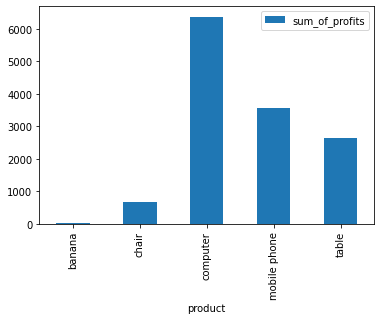

In [68]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
pd.options.plotting.backend = "matplotlib" # this defines the backend for the whole session

df = pd.read_pickle('./data/df_products_random.pickle')
df.groupby(by='product').agg(sum_of_profits=('profit', 'sum')).reset_index().plot(x='product', y='sum_of_profits', kind='bar')

## Styling

Let's prepare an example DataFrame. Don't mind the cryptic code just look at this boring table below and wait until I show some styling 🦄!

In [69]:
df = pd.read_pickle('./data/df_products_random.pickle').head(10).sort_values(by='profit').reset_index(drop=True)
df['product'] = df['product'].replace({'mobile phone':pd.NA, 'banana':pd.NA})
df.iloc[0:3, df.columns.get_loc('profit')] = -df['profit']
df

,profit,product,profile_id,timestamp
0,-1.219595,<NA>,8,2018-01-27 03:59:38+00:00
1,-1.507194,<NA>,2,2018-03-29 19:42:22+00:00
2,-1.533321,<NA>,4,2018-02-06 11:22:46+00:00
3,27.883223,chair,9,2018-02-15 00:24:38+00:00
4,103.239984,table,9,2018-02-02 21:19:35+00:00
5,141.481716,table,1,2018-02-11 20:57:53+00:00
6,262.311584,<NA>,9,2018-01-04 06:31:21+00:00
7,300.981553,computer,9,2018-02-12 05:06:25+00:00
8,312.892860,computer,6,2018-03-05 01:22:00+00:00
9,330.141383,computer,5,2018-03-15 23:15:31+00:00


Let's put some colors on our table. This is what we'll do:
* highlight NULL values (display them in grey)
* highlight the maximum value in column timestamp
* hide the index
* show green bars for column profit
* set the text color to red fore negative numbers and set the text color for other values to "navy"

You'll find even more styling methods in the [documentation of pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html).

In [70]:
# custom styling function! Taken from pandas docs on styling and modified a little
def color_negative_values_in_red(val):
    color = 'red' if pd.api.types.is_number(val) and val < 0 else 'navy'
    return f'color:{color}'


# show DataFrame with style 😎
(df.style
 .highlight_null(null_color='grey')
 .highlight_max(axis=0, subset=['timestamp'])
 .hide_index()
 .bar(subset=['profit'], color='lightgreen')
 .applymap(color_negative_values_in_red))

profit,product,profile_id,timestamp
-1.219595,,8,2018-01-27 03:59:38+00:00
-1.507194,,2,2018-03-29 19:42:22+00:00
-1.533321,,4,2018-02-06 11:22:46+00:00
27.883223,chair,9,2018-02-15 00:24:38+00:00
103.239984,table,9,2018-02-02 21:19:35+00:00
141.481716,table,1,2018-02-11 20:57:53+00:00
262.311584,,9,2018-01-04 06:31:21+00:00
300.981553,computer,9,2018-02-12 05:06:25+00:00
312.892860,computer,6,2018-03-05 01:22:00+00:00
330.141383,computer,5,2018-03-15 23:15:31+00:00


## Categoricals

This is a data type in pandas which is particularly memory efficient.

> A categorical variable takes on a limited, and usually fixed, number of possible values.
>
> Categorical data might have an order (e.g. ‘strongly agree’ vs ‘agree’ or ‘first observation’ vs. ‘second observation’)
> but numerical operations (additions, divisions, …) are not possible.

I personally rarely think about using it but it is quite interesting which is why I would point you to the
[documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) and only show how it "looks like" in some examples.

Similarly to the "single" objects pandas Timestamps there are "single" objects for categoricals (which can actually contain multiple values so this is confusing 🙈...).

In [71]:
categories = pd.Categorical(values=['bad', pd.NA, 'good'],
                            categories=['terrible', 'bad', 'okayish', 'good', 'great'],
                            ordered=True) # terrible < bad < okayish... etc
categories

['bad', NaN, 'good']
Categories (5, object): ['terrible' < 'bad' < 'okayish' < 'good' < 'great']

And of course there are also categorical Series

In [72]:
import numpy as np

# list unique categories in their correct orders,
# then generate a list of N values from those categories
unique_categories = ['terrible', 'bad', 'okayish', 'good', 'great']
random_categories = np.random.choice(unique_categories, size=100)

# we can use pd.Categorical to construct our Series
categories = pd.Categorical(values=random_categories,
                            categories=unique_categories,
                            ordered=True)
s = pd.Series(categories)
s

0     terrible
1      okayish
2         good
3          bad
4     terrible
        ...   
95         bad
96         bad
97         bad
98        good
99       great
Length: 100, dtype: category
Categories (5, object): ['terrible' < 'bad' < 'okayish' < 'good' < 'great']

# Bonus: Pandas traps

![Trap for pandas](./imgs/pandas_trap.jpg)

## Remember that by default `df.groupby` disgards records where at least one of the group values is null

In [73]:
df = pd.DataFrame({'fruits':['bananas', 'bananas', pd.NA, 'apples', 'apples'],
                   'year':[2019, 2019, 2020, pd.NA, 2021],
                   'profits_in_dollars':[10000, 20000, 45000, 60000, 20000]}).convert_dtypes()
display(df)

# with parameter dropna not provided (defaults to True)
df_grouped = df.groupby(['year', 'fruits']).agg(sum_of_profits=('profits_in_dollars', 'sum'))
display(df_grouped)

# with dropna=True
df_grouped_with_null = df.groupby(['year', 'fruits'], dropna=False).agg(sum_of_profits=('profits_in_dollars', 'sum'))
df_grouped_with_null

,fruits,year,profits_in_dollars
0,bananas,2019,10000
1,bananas,2019,20000
2,<NA>,2020,45000
3,apples,<NA>,60000
4,apples,2021,20000


,,sum_of_profits
year,fruits,
2019,bananas,30000
2021,apples,20000


,,sum_of_profits
year,fruits,
2019.0,bananas,30000
2020.0,NaN,45000
2021.0,apples,20000
NaN,apples,60000


## Null values

### Differences in behaviors between the (still) default pandas null value `NaN` (`numpy.nan`) and the new null "sentinel" from pandas `pd.NA`

Note that this is probably non exhaustive.

> `pd.NA` follows the rules of the [three-valued logic](https://en.wikipedia.org/wiki/Three-valued_logic) (or Kleene logic, similarly to R, SQL and Julia).
>
> --- _[pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#logical-operations)_

`np.nan` is not equal to itself 🐒

In [74]:
import numpy as np
np.nan == np.nan

False

This works as one would probably expect 🤔 

In [75]:
np.nan in (1, 2, np.nan)

True

Now things get interesting. The following example returns a null value (the logic being we don't know ¯\\\_(ツ)\_/¯)

In [76]:
pd.NA == pd.NA

<NA>

None of the following examples will work (I even had to troubleshoot this in a library of mine because of this when upgrading pandas 🙀)

In [77]:
try:
    pd.NA in (1, 2)
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-77-0194849127e8>", line 2, in <module>
    pd.NA in (1, 2)
  File "pandas/_libs/missing.pyx", line 360, in pandas._libs.missing.NAType.__bool__
TypeError: boolean value of NA is ambiguous


In [78]:
try:
    pd.NA in (1, 2, pd.NA)
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-78-e754dd5cdffa>", line 2, in <module>
    pd.NA in (1, 2, pd.NA)
  File "pandas/_libs/missing.pyx", line 360, in pandas._libs.missing.NAType.__bool__
TypeError: boolean value of NA is ambiguous


In the example below 3 is not in the tuple so it does not work (3 could be what the NULL value was supposed to be but we don't know)

In [79]:
try:
    3 in (1, 2, pd.NA)
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-79-52619a031a74>", line 2, in <module>
    3 in (1, 2, pd.NA)
  File "pandas/_libs/missing.pyx", line 360, in pandas._libs.missing.NAType.__bool__
TypeError: boolean value of NA is ambiguous


But this will work though since 2 is in the tuple

In [80]:
2 in (1, 2, pd.NA)

True

## Losing the index when merging

⚠️ If you use merge without using indices as we did before, any indices you had will be gone in the resulting DataFrame. Even in the case of a one-to-one relationship.

In [81]:
df = pd.DataFrame({'full_name':['John Rambo', 'John Travolta']}, index=pd.Index([100, 200], name='id'))
df_new_info = pd.DataFrame({'full_name':['Arnold Schwarzenegger', 'John Rambo', 'John Travolta', 'Daniel Zimmermann'],
                            'has_lots_of_muscles':[True, True, True, False],
                            'country':['US', 'US', 'US', 'DE']})
display_side_by_side(df, df_new_info)

df_merged = df.merge(df_new_info, on='full_name', validate='1:1')
print('\nOh noes the index is gone after I merged 😿')
df_merged

full_name 
 
 
 id 
 
 
 
 
 
 100 
 John Rambo 
 
 
 200 
 John Travolta 
 
 
 
 
 
 
 full_name 
 has_lots_of_muscles 
 country 
 
 
 
 
 0 
 Arnold Schwarzenegger 
 True 
 US 
 
 
 1 
 John Rambo 
 True 
 US 
 
 
 2 
 John Travolta 
 True 
 US 
 
 
 3 
 Daniel Zimmermann 
 False 
 DE


Oh noes the index is gone after I merged 😿


,full_name,has_lots_of_muscles,country
0,John Rambo,True,US
1,John Travolta,True,US


How I'd probably handle such a situation would be something like this 🤔. But surely there are other ways... You just have to get creative.

In [82]:
# put "id" in the columns before merging then merge then put the index back as it was
df_merged = (df
             .reset_index()
             .merge(df_new_info, on='full_name', validate='1:1')
             .set_index(df.index.names))
df_merged

,full_name,has_lots_of_muscles,country
id,,,
100,John Rambo,True,US
200,John Travolta,True,US


## Index mismatches 🙀!

In the example below we ask pandas to set values of one column of a DataFrame (so a pd.Series) to the values of another column (in another DataFrame). pandas **aligns** what is on the right and on the left of the assigment by using the **index**. In case of mismatch you get a NULL.

In [83]:
df = pd.DataFrame({'example':['foo', 'bar', 'baz']}, index=[0, 1, 2])
df2 = pd.DataFrame({'example2':['a', 'b', 'c', 'd']}, index=['a', 1, 'c', 'd']) # the index length won't even match
display_side_by_side(df, df2)

df['example2'] = df2['example2']
df.convert_dtypes()

,example
0,foo
1,bar
2,baz
,example2
a,a
1,b
c,c
d,d


,example,example2
0,foo,<NA>
1,bar,b
2,baz,<NA>
